# Проект: Создание модели машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Анализ возможной прибыли и рисков техникой Bootstrap

## Введение

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;<br>
Строят модель для предсказания объёма запасов в новых скважинах;<br>
Выбирают скважины с самыми высокими оценками значений;<br>
Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.

### Цель исследования

1. Построить модель для определения региона, где добыча нефти принесёт наибольшую прибыль;
2. Проанализировать возможную прибыль и риски техникой Bootstrap.

### Ход исследования

1. Загрузка и подготовка данных;
2. Обучение и проверка модели для каждого региона;
3. Подготовка к расчёту прибыли;
4. Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели;
5. Подсчет рисков и прибыли для каждого региона.

## Загрузка и подготовка данных

### Загрузка данных

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  print('Google Drive не установлен.')

Mounted at /content/drive


In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [ ]:
# объявление констант
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
# загрузка данных

# Определяем, где мы находимся
if 'google.colab' in sys.modules:
    # Google Colab
    dataset_url_0 = '/content/drive/MyDrive/Colab Notebooks/08. ML in business/datasets/geo_data_0.csv'
    dataset_url_1 = '/content/drive/MyDrive/Colab Notebooks/08. ML in business/datasets/geo_data_1.csv'
    dataset_url_2 = '/content/drive/MyDrive/Colab Notebooks/08. ML in business/datasets/geo_data_2.csv'
else:
    # локальная среда (Jupyter)
    dataset_url_0 = '/datasets/geo_data_0.csv'
    dataset_url_1 = '/datasets/geo_data_1.csv'
    dataset_url_2 = '/datasets/geo_data_2.csv'

geo_0 = pd.read_csv(dataset_url_0)
geo_1 = pd.read_csv(dataset_url_1)
geo_2 = pd.read_csv(dataset_url_2)

In [ ]:
# словарь датафреймов
dataframes = {
    'geo_0': geo_0,
    'geo_1': geo_1,
    'geo_2': geo_2,
}

In [ ]:
# общий взгляд на данные
for name, data in dataframes.items():
  display(f'Общий взгляд на {name}:', data.head())
  print('_' * 100)

'Общий взгляд на geo_0:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


____________________________________________________________________________________________________


'Общий взгляд на geo_1:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


____________________________________________________________________________________________________


'Общий взгляд на geo_2:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


____________________________________________________________________________________________________


In [ ]:
# просмотр краткого содержания данных
for name, data in dataframes.items():
  print(f'Краткое содержание {name}:', data.info())
  print('_' * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Краткое содержание geo_0: None
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Предобработка данных

#### Изменение типов данных

Не требуется

#### Пропущенные значения

Исходя из краткого описания данных отсутствуют.

#### Поиск и удаление дубликатов

In [ ]:
# явные дубликаты
for name, data in dataframes.items():
  print(f'Количество дубликатов в {name}:', data.duplicated().sum())
  print('_' * 100)

Количество дубликатов в geo_0: 0
____________________________________________________________________________________________________
Количество дубликатов в geo_1: 0
____________________________________________________________________________________________________
Количество дубликатов в geo_2: 0
____________________________________________________________________________________________________


Дубликаты не обнаружены

In [ ]:
# неявные дубликаты
for column in geo_0.columns:
    print(column, geo_0[column].nunique(), '\n')
print('_' * 100)

for column in geo_1.columns:
    print(column, geo_1[column].nunique(), '\n')
print('_' * 100)

for column in geo_2.columns:
    print(column, geo_2[column].nunique(), '\n')

id 99990 

f0 100000 

f1 100000 

f2 100000 

product 100000 

____________________________________________________________________________________________________
id 99996 

f0 100000 

f1 100000 

f2 100000 

product 12 

____________________________________________________________________________________________________
id 99996 

f0 100000 

f1 100000 

f2 100000 

product 100000 



Некоторые уникальные идентификаторы повторяются (незначительное количество в размерах датасетов), но при этом остальные значения в других столбцах - неповторимы. Удалим их.

In [ ]:
for name, data in dataframes.items():
  data.drop_duplicates(subset=['id'], inplace=True)
  print(
      f'Форма DataFrame {name}',
      data.shape
      )
  print(
      f'Количество дубликатов в столбце id DataFrame {name}:',
      data['id'].duplicated().sum()
      )
  print('_' * 100)

Форма DataFrame geo_0 (99990, 5)
Количество дубликатов в столбце id DataFrame geo_0: 0
____________________________________________________________________________________________________
Форма DataFrame geo_1 (99996, 5)
Количество дубликатов в столбце id DataFrame geo_1: 0
____________________________________________________________________________________________________
Форма DataFrame geo_2 (99996, 5)
Количество дубликатов в столбце id DataFrame geo_2: 0
____________________________________________________________________________________________________


### Исследовательский  и корреляционный анализ данных

#### Исследовательский анализ данных

In [ ]:
# просмотр краткого содержания данных
for name, data in dataframes.items():
  print(f'Краткое содержание DataFrame {name}')
  display(data.describe())
  print('_' * 100)

Краткое содержание DataFrame geo_0


,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


____________________________________________________________________________________________________
Краткое содержание DataFrame geo_1


,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


____________________________________________________________________________________________________
Краткое содержание DataFrame geo_2


,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


____________________________________________________________________________________________________


В каждом регионе есть скважины с отсутствием нефти.<br>
По медианному и среднему объемам запасов второй регион уступает остальным.<br>
Скважина, имеющая максимальный объем запасов, во втором регионе имеет меньшее значение обхема, чем аналогичная в регионе №1 и регионе №3.

Посмотрим на диаграммы размаха и графики распределения признаков:

In [ ]:
# создадим функцию для построения графиков
def make_plots(data, color):
    fig = plt.figure(figsize=(14,20))
    subplt = 1
    x_labels = ['значения f0', 'значения f1', 'значения f2', \
                'Объём запасов в скважине (тыс. баррелей)']
    for n, c in enumerate(data.iloc[:, 1:]):
        ax = fig.add_subplot(4, 2, subplt)
        sns.boxplot(y=data[c], color=color, width=.3)
        subplt += 1
        plt.title(f'Диаграмма размаха {c}')
        plt.xlabel(f'Признак {c}')
        plt.ylabel('Значения')
        ax = fig.add_subplot(4, 2, subplt)
        sns.histplot(data[c], bins=30, color=color)
        subplt += 1
        plt.title(f'Гистограмма {c}')
        plt.xlabel(x_labels[n])
        plt.ylabel('Количество значений')

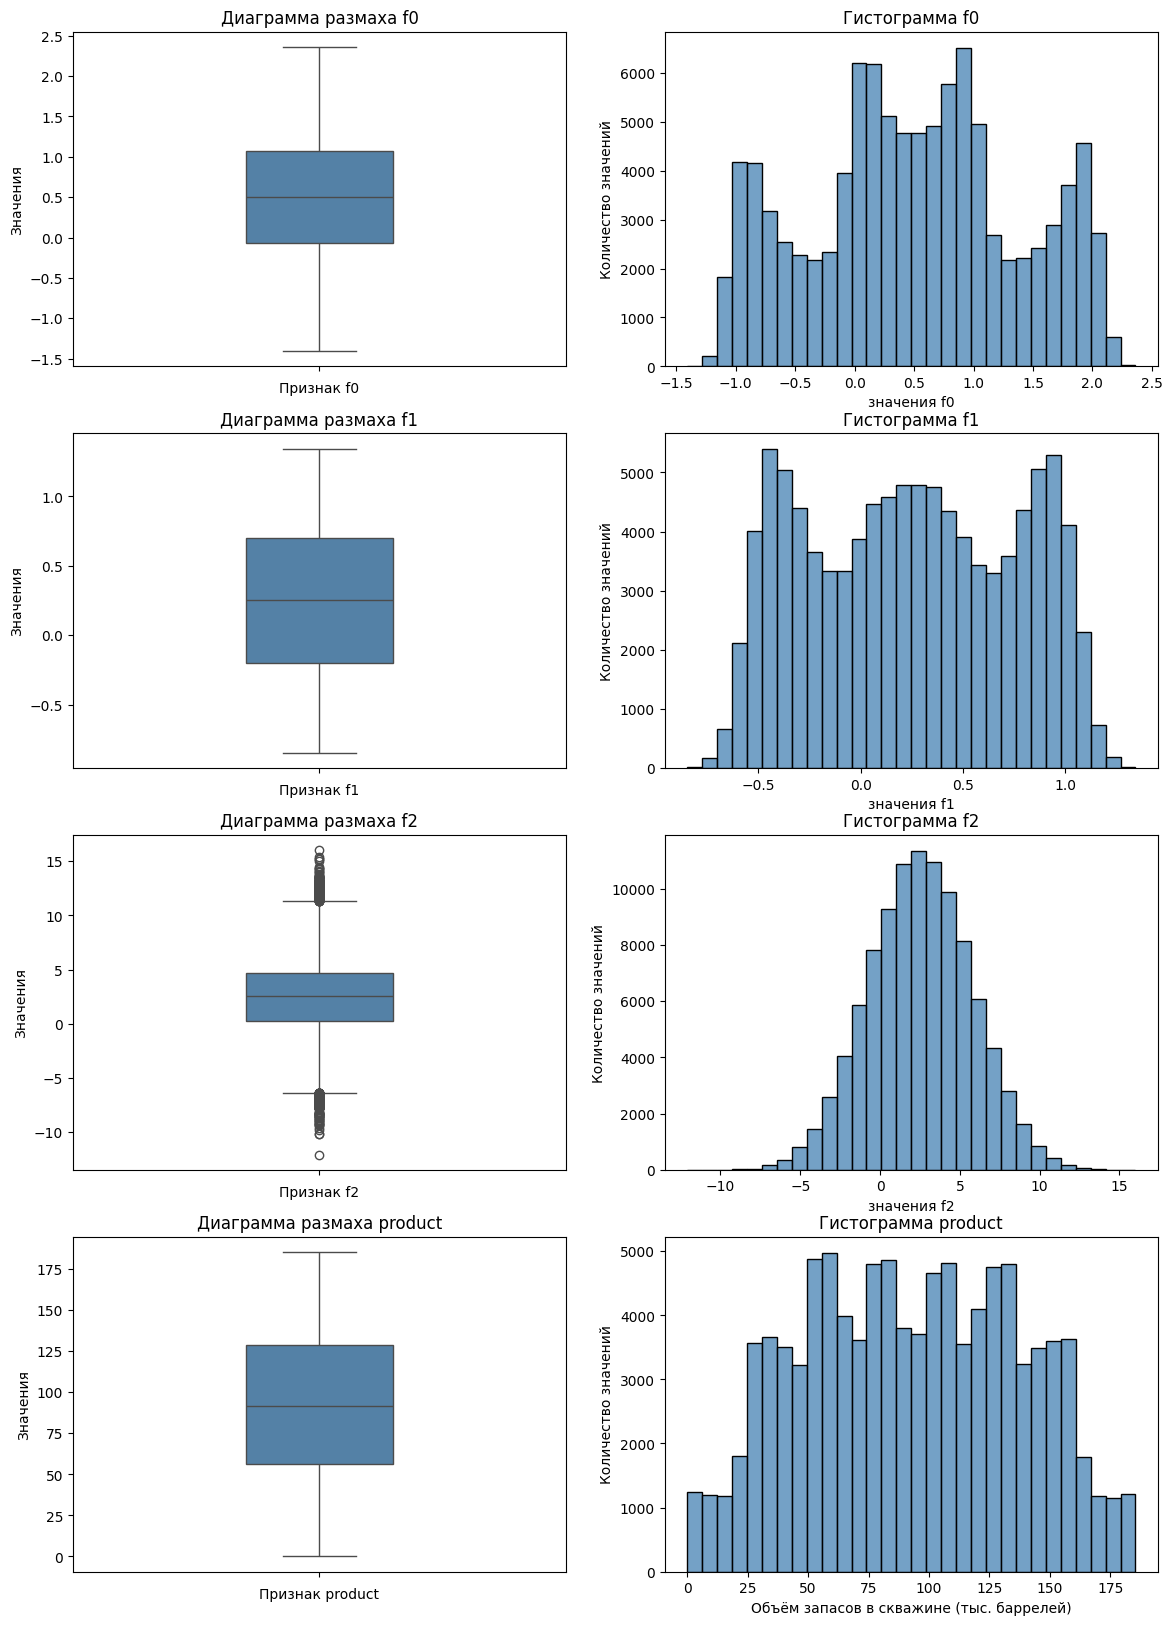

In [ ]:
# для региона geo_0
make_plots(geo_0, 'steelblue')

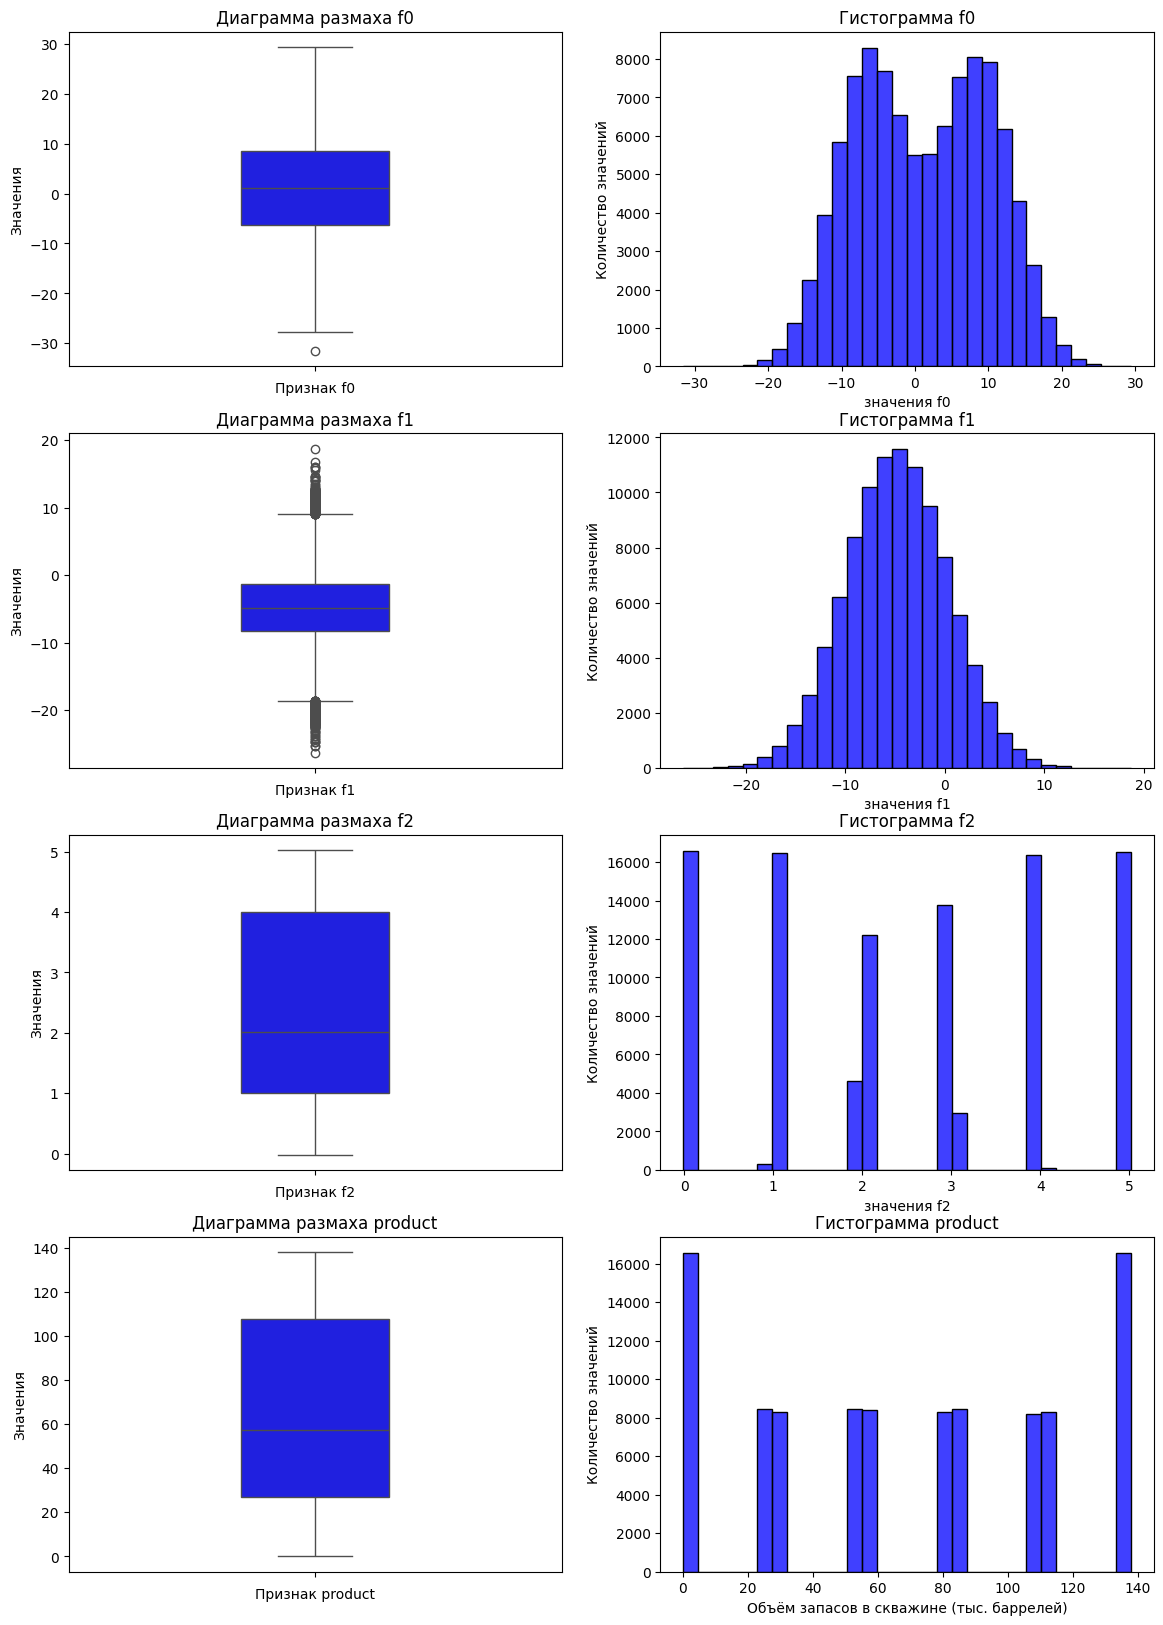

In [ ]:
# для региона geo_1
make_plots(geo_1, 'blue')

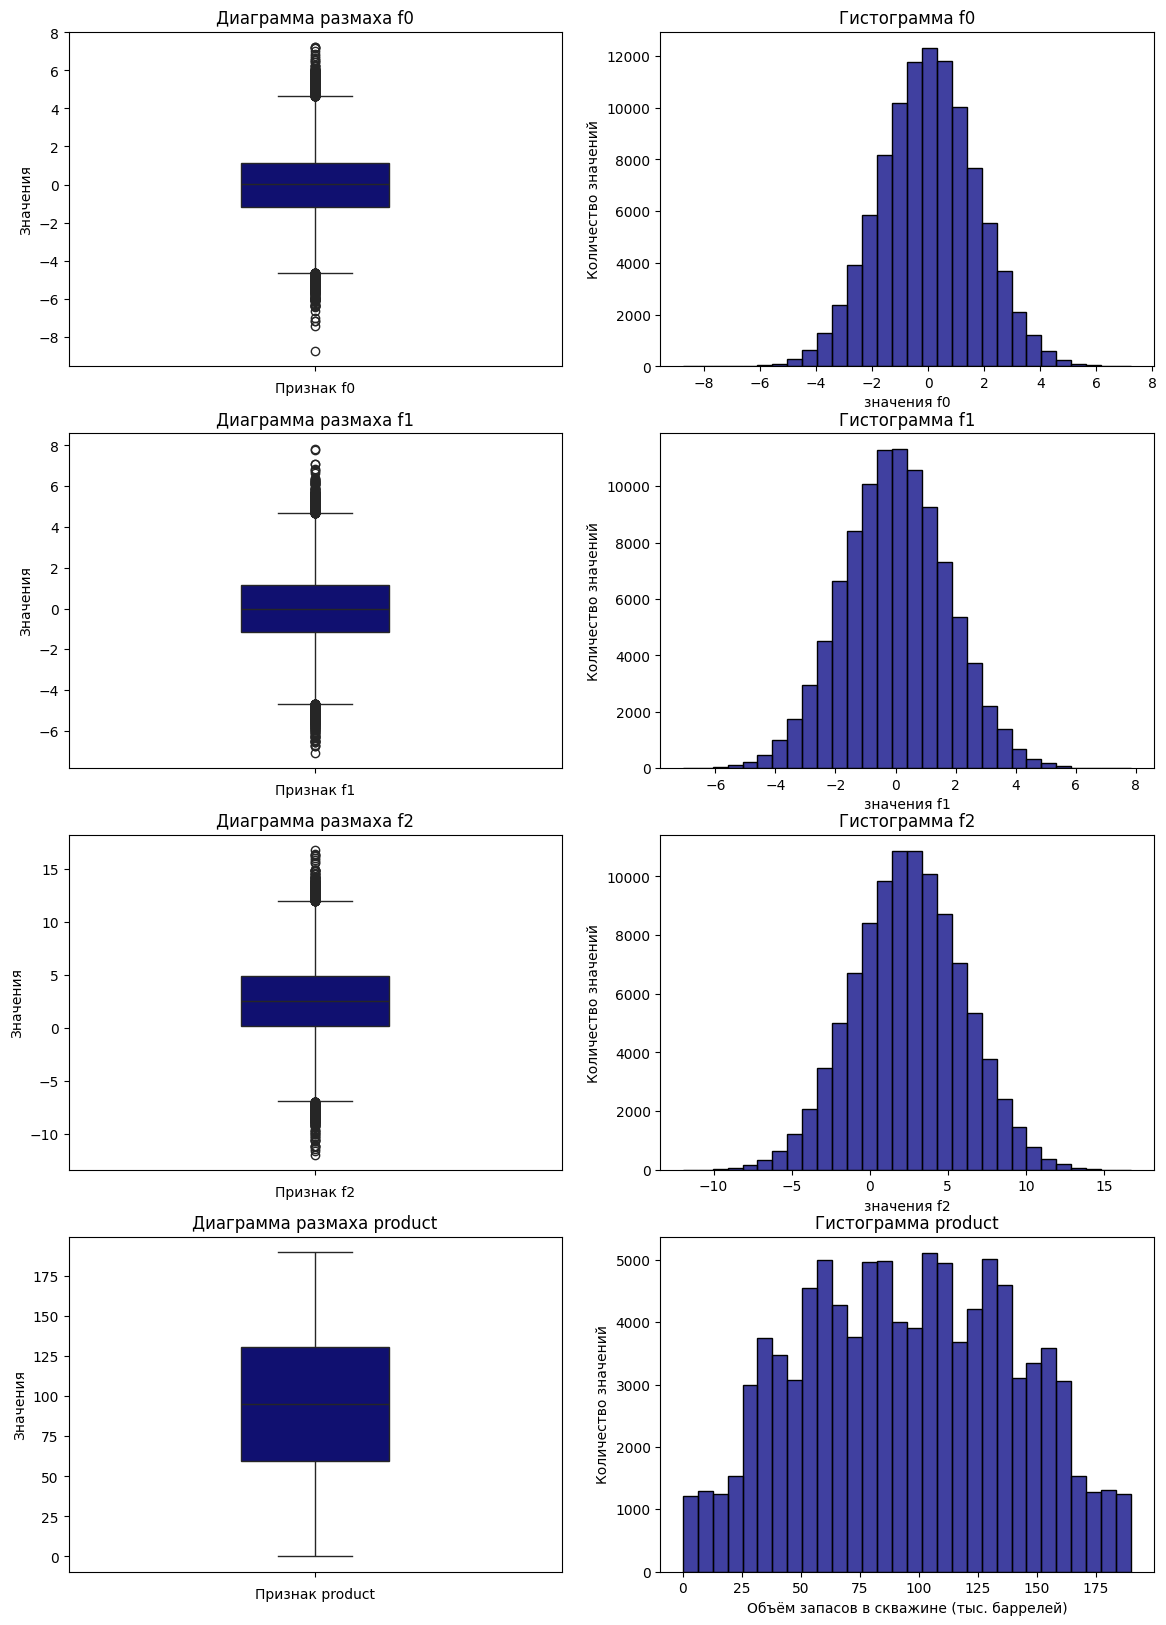

In [ ]:
# для региона geo_2
make_plots(geo_2, 'navy')

Распределение целевого признака в регионе geo_1 сильно отличается от нормального и распределений других регионов. Возможно, группы скважин в geo_1 были слишком близко расположены друг к другу.
В целевом признаке geo_1 сильно проседают объемы в середине распределения, но высоки по границам.

Целевая метрика -  RMSE, она чувствительна к выбросам. <br>
Метод обнаружения выбросов IQR — это метод, который показывает, что любая точка данных в диаграмме, которая находится более чем на 1,5 IQR ниже данных первого квартиля или более чем на 1,5 IQR выше данных третьего квартиля, считается выбросом. IQR использует масштаб 1,5 для обнаружения выбросов, поскольку он наиболее точно соответствует распределению Гаусса. В нашем случае признаки, имеющие выбросы, имеют распределение, близкое к нормальному.
Посмотрим, сколько есть выбросов:

In [ ]:
# выбросы в geo_0
q25 = np.quantile(geo_0['f2'], 0.25)
q75 = np.quantile(geo_0['f2'], 0.75)
outliers_1 = q25 - 1.5*(q75-q25)
outliers_2 = q75 + 1.5*(q75-q25)

print(outliers_1)
print(outliers_2)

-6.353092368893078
11.355912153010593


In [ ]:
# выбросы в geo_1
q25 = np.quantile(geo_1['f1'], 0.25)
q75 = np.quantile(geo_1['f1'], 0.75)
outliers_1 = q25 - 1.5*(q75-q25)
outliers_2 = q75 + 1.5*(q75-q25)

print(outliers_1)
print(outliers_2)

-18.670738069582377
9.069937223519565


In [ ]:
# выбросы в geo_2
for c in geo_2[['f0', 'f1', 'f2']]:
    q25 = np.quantile(geo_2[c], 0.25)
    q75 = np.quantile(geo_2[c], 0.75)
    outliers_1 = q25 - 1.5*(q75-q25)
    outliers_2 = q75 + 1.5*(q75-q25)

    print(outliers_1)
    print(outliers_2)
    print('_' * 25)

-4.643535315716807
4.639685038758099
_________________________
-4.682385740967018
4.671067758835415
_________________________
-6.962407576661303
11.951396337319967
_________________________


In [ ]:
# смотрим на количество выбросов
outliers_geo_0 = geo_0.query('f2 < -6.35 or f2 > 11.35')
display(outliers_geo_0.shape)
print(
    'Количество выбросов в geo_0:',
    '{:.1%}'.format(outliers_geo_0.shape[0] / geo_0.shape[0])
    )
print('_' * 25)

outliers_geo_1 = geo_1.query('f1 < -18.67 or f1 > 9.06')
display(outliers_geo_1.shape)
print(
    'Количество выбросов в geo_1:',
    '{:.1%}'.format(outliers_geo_1.shape[0] / geo_1.shape[0])
    )
print('_' * 25)

outliers1_geo_2 = geo_2.query('f0 < -4.64 or f0 > 4.63')
outliers2_geo_2 = geo_2.query('f1 < -4.68 or f1 > 4.67')
outliers3_geo_2 = geo_2.query('f2 < -6.96 or f2 > 11.95')
display(outliers1_geo_2.shape)
print(
    'Количество выбросов в geo_2, признак f0:',
    '{:.1%}'.format(outliers1_geo_2.shape[0] / geo_2.shape[0])
    )
display(outliers2_geo_2.shape)
print(
    'Количество выбросов в geo_2, признак f1:',
    '{:.1%}'.format(outliers2_geo_2.shape[0] / geo_2.shape[0])
    )
display(outliers3_geo_2.shape)
print(
    'Количество выбросов в geo_2, признак f2:',
    '{:.1%}'.format(outliers3_geo_2.shape[0] / geo_2.shape[0])
    )

(0, 6)

Количество выбросов в geo_0: 0.0%
_________________________


(0, 6)

Количество выбросов в geo_1: 0.0%
_________________________


(0, 6)

Количество выбросов в geo_2, признак f0: 0.0%


(0, 6)

Количество выбросов в geo_2, признак f1: 0.0%


(0, 6)

Количество выбросов в geo_2, признак f2: 0.0%


В процентном отношении ко всему размеру DataFrame, выбросов немного. Удалим их:

In [ ]:
geo_0 = geo_0.drop(outliers_geo_0.index).reset_index()
print(geo_0.shape)

geo_1 = geo_1.drop(outliers_geo_1.index).reset_index()
print(geo_1.shape)

geo_2 = geo_2.drop(outliers1_geo_2.index)
geo_2 = geo_2.drop(geo_2.query('f1 < -4.68 or f1 > 4.67').index)
geo_2 = geo_2.drop(geo_2.query('f2 < -6.96 or f2 > 11.95').index).reset_index()
print(geo_2.shape)

(99481, 6)
(99360, 6)
(97992, 6)


#### Корреляционный анализ данных

Судя по ранее рассмотренным распределениям количественных признаков,  не все они имеют нормальное распределение. В таком случае используем коэффициенты корреляции Спирмена:

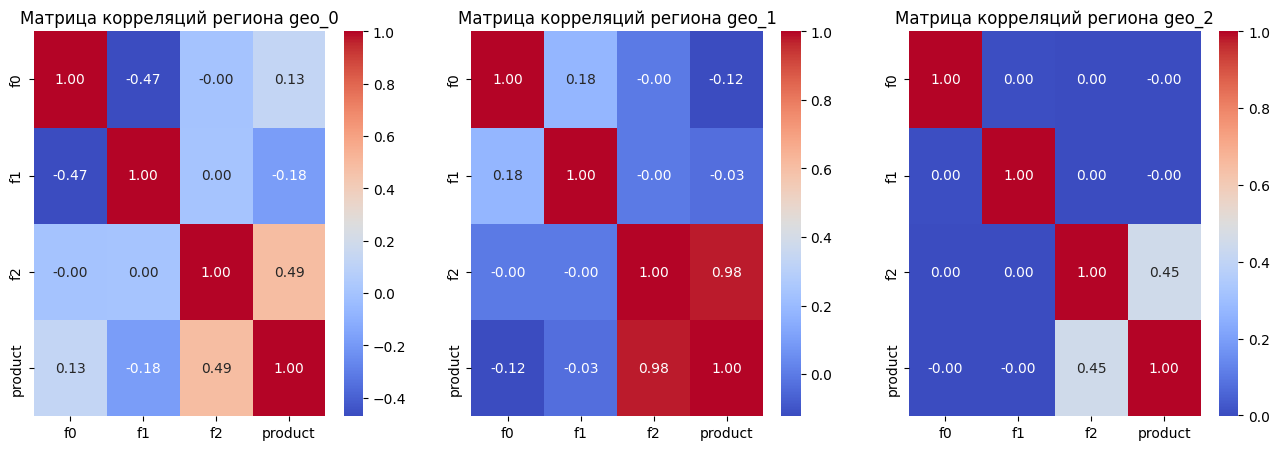

In [ ]:
fig = plt.figure(figsize=(16,5))
subplot = 1

for name, data in dataframes.items():
    ax = fig.add_subplot(1, 3, subplot)
    sns.heatmap(
        data.drop('id', axis=1).corr(method='spearman'),
        cmap='coolwarm',
        annot=True,
        fmt='.2f'
        )
    plt.title(f'Матрица корреляций региона {name}')
    subplot +=1

Интересная картина. Наибольшая корреляция признака product наблюдается с признаком f2 во всех регионах, но с разной силой.

Мультиколлинеарности между признаками не наблюдается, дополнительной проверки с помощью VIF делать не будем.

Посмотрим на диаграммы рассеяния количественных признаков для разных регионов для лушего понимания данных:

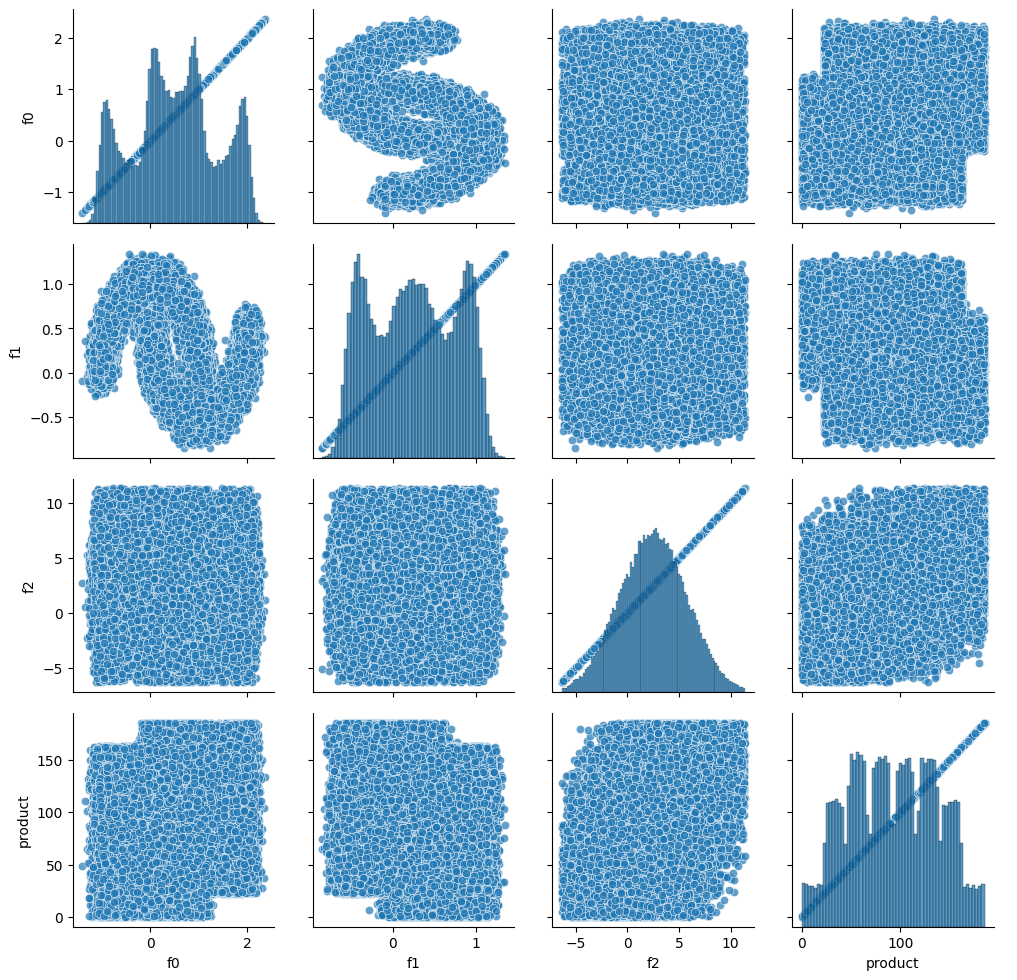

In [ ]:
# для региона geo_0
g = sns.PairGrid(geo_0.iloc[:, 1:])
g.map_diag(sns.histplot)
g.map(sns.scatterplot, alpha=0.7)
g.add_legend()

pass

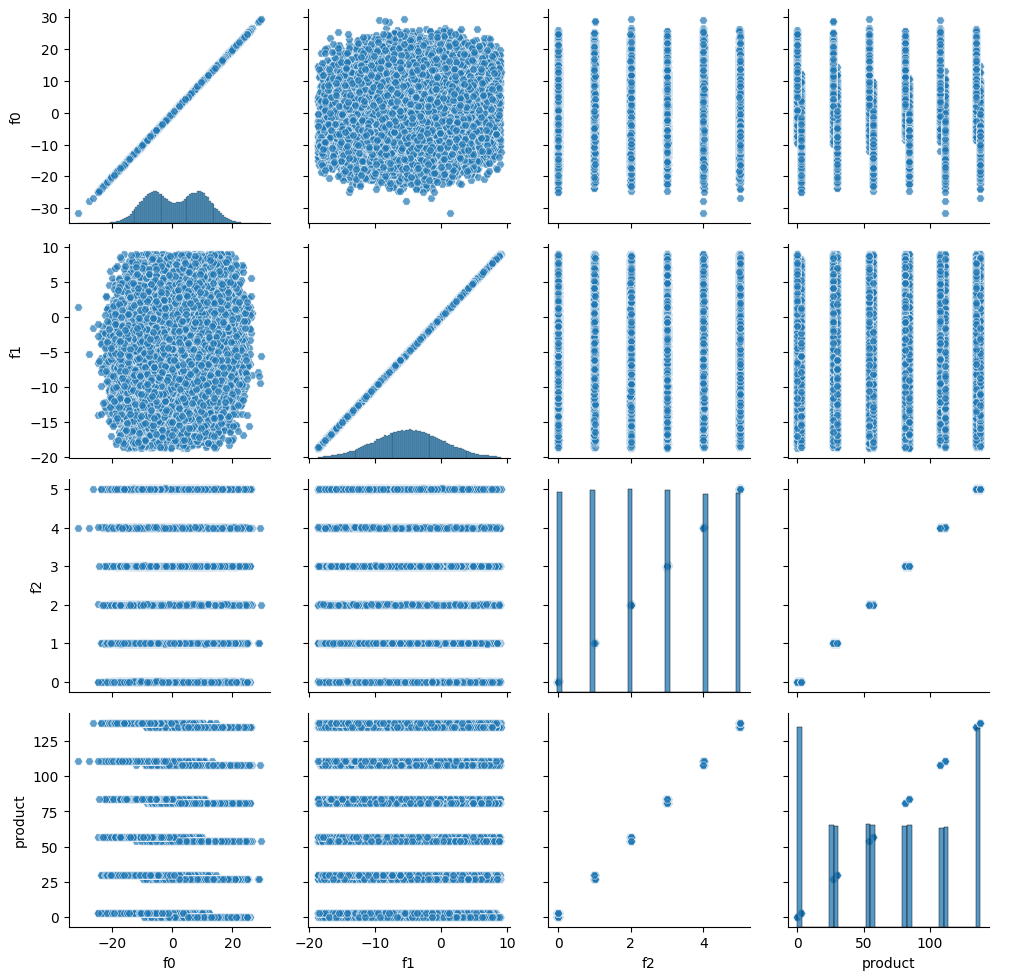

In [ ]:
# для региона geo_1
g = sns.PairGrid(geo_1.iloc[:, 1:])
g.map_diag(sns.histplot)
g.map(sns.scatterplot, alpha=0.7, marker='H')
g.add_legend()

pass

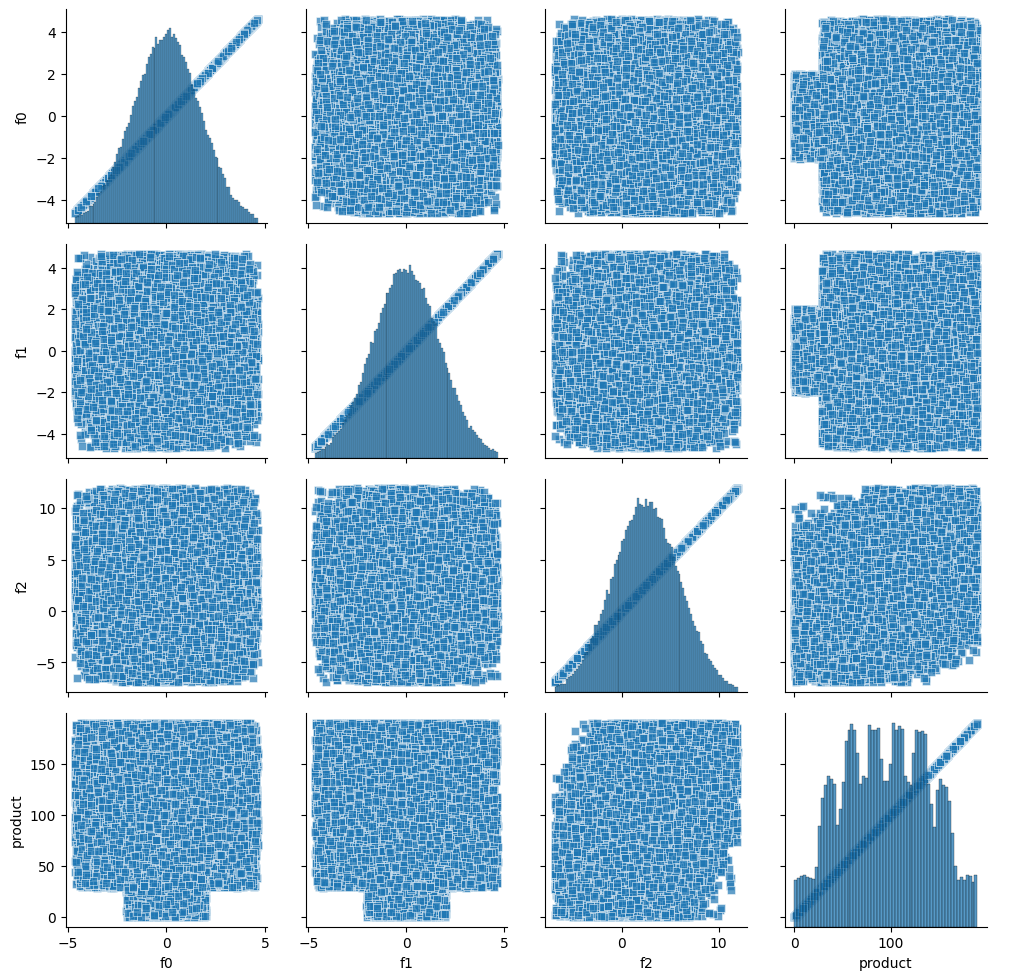

In [ ]:
# для региона geo_2
g = sns.PairGrid(geo_2.iloc[:, 1:])
g.map_diag(sns.histplot)
g.map(sns.scatterplot, alpha=0.7, marker='s')
g.add_legend()

pass

Geo_0:
Наиболее похожая на линейную взаимосвязь наблюдается у целевого признака и f2. При этом у f2 - красивое нормальное распределение.
Взаимосвязь f1 и f0 выглядит необычно и эффектно.

Geo_1:
Четкая линейная взаимосвязь целевого признака и f2.
Нормальное распределение у f1.

Geo_2:
Наиболее похожая на линейную взаимосвязь наблюдается у целевого признака и f2.
Нормальные распределения у всех признаков f.

### Подготовка данных

In [ ]:
# создание списков количественных и качественных переменных, создаание функции для подготовки данных
ohe_columns = []
num_columns = ['f0', 'f1', 'f2']

def preparing_data(data, ohe_columns, num_columns):
    '''
    Разбивка данных на тренировочную и валидационную выборки,
    кодирование категориальных признаков с помощью OneHotEncoder,
    масштабироване количественных признаков с помощью StandardScaler,
    стратификацию не делаем для задачи регрессии
    '''
    X_train, X_valid, y_train, y_valid = train_test_split(
        data.drop(['product'], axis=1),
        data['product'],
        test_size = TEST_SIZE,
        random_state = RANDOM_STATE
        )

    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[ohe_columns])
    X_valid_ohe = encoder.transform(X_valid[ohe_columns])

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_columns])
    X_valid_scaled = scaler.transform(X_valid[num_columns])

    '''Объединение в один DataFrame для дальнейшего обучения'''
    df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
    df_X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns)
    df_X_train_merged = df_X_train_scaled.merge(
        df_X_train_ohe, right_index=True, left_index=True
        )

    df_X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_columns)
    df_X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=ohe_columns)
    df_X_valid_merged = df_X_valid_scaled.merge(
        df_X_valid_ohe, right_index=True, left_index=True
        )

    '''
    Инициализация модели LR, обучение модели,
    получение предсказаний на валидационной выборке
    '''
    model_lr  = LinearRegression()
    model_lr.fit(df_X_train_merged, y_train)

    predictions = model_lr.predict(df_X_valid_merged)

    return y_valid, predictions

In [ ]:
# функция для вывода реал. значений целевого признака и предсказанных  значений
def make_df(model):
    dict = {
        'y_valid': model[0].tolist(),
        'predictions': model[1]
    }
    df_valid_pred = pd.DataFrame(dict)
    return df_valid_pred

### Выводы

Данные загружены и изучены.<br><br><br>

Произведена предобработка данных. Так, удалены неявные дубликаты.<br><br><br>

Исследовательский и корреляционный анализ данных

В каждом регионе есть скважины с отсутствием нефти.<br>
По медианному и среднему объемам запасов второй регион уступает остальным.<br>
Скважина, имеющая максимальный объем запасов, во втором регионе имеет меньшее значение обхема, чем аналогичная в регионе №1 и регионе №3.<br><br>

Распределение целевого признака в регионе geo_1 сильно отличается от нормального и распределений других регионов. Возможно, группы скважин в geo_1 были слишком близко расположены друг к другу.
В geo_1 целевой признак сильно проседают объемы в середине распределения, но высоки по границам.
Были удалены выбросы, т.к. они влияют на целевую метрику RMSE.<br><br>

Наибольшая корреляция признака product наблюдается с признаком f2 во всех регионах, но с разной силой.<br><br>

Наиболее похожая на линейную взаимосвязь наблюдается у целевого признака и f2 (при этом в geo_1 - четкая линейная взаимосвязь).
Взаисосвязь признаков друг с другом отчиается от региона к региону.<br><br><br>

Далее проведена подготовка данных для дальнейшего обучения моделей трех регионов. С этой целью создана функция, которая выполняет разбивку датасетов на тренировочню и валидационную выборки, масштабирует количественные признаки, кодирует качественные, инициалирует и обучает модель линейной регрессии.

## Обучение модели

In [ ]:
# обучение модели региона geo_0
model_geo_0 = preparing_data(geo_0, ohe_columns, num_columns)

# обучение модели региона geo_1
model_geo_1 = preparing_data(geo_1, ohe_columns, num_columns)

# обучение модели региона geo_2
model_geo_2 = preparing_data(geo_2, ohe_columns, num_columns)

# словарь с моделями
models = {
    'model_geo_0': model_geo_0,
    'model_geo_1': model_geo_1,
    'model_geo_2': model_geo_2
}

In [ ]:
# выведем предсказанные и валидационные (реальные) данные
for name, data in models.items():
    display(
        f'Реальные и предсказанные значения целевого признака {name}',
        make_df(data).head()
        )
    print('_' * 100)

'Реальные и предсказанные значения целевого признака model_geo_0'

,y_valid,predictions
0,159.064974,100.557707
1,34.628816,94.873014
2,132.625098,128.343258
3,108.678504,100.427530
4,38.289086,29.600648


____________________________________________________________________________________________________


'Реальные и предсказанные значения целевого признака model_geo_1'

,y_valid,predictions
0,110.992147,110.586967
1,80.859783,82.311178
2,110.992147,111.429295
3,84.038886,84.706686
4,26.953261,27.514097


____________________________________________________________________________________________________


'Реальные и предсказанные значения целевого признака model_geo_2'

,y_valid,predictions
0,102.574813,78.870005
1,43.133258,61.459470
2,141.241538,118.566917
3,147.768680,123.496137
4,143.862050,118.450534


____________________________________________________________________________________________________


In [ ]:
# вывод среднего запаса предсказанного сырья и RMSE
for name, data in models.items():
    print(f'--Результаты {name}--')
    print(
        'Средний запас предсказанного сырья, тыс. баррелей:',
        data[1].mean()
        )
    print(
        'Значение метрики RMSE, тыс. баррелей:',
        root_mean_squared_error(data[0], data[1])
        )
    print('_' * 100)

--Результаты model_geo_0--
Средний запас предсказанного сырья, тыс. баррелей: 92.71182234657944
Значение метрики RMSE, тыс. баррелей: 37.44604715174543
____________________________________________________________________________________________________
--Результаты model_geo_1--
Средний запас предсказанного сырья, тыс. баррелей: 68.95891501788286
Значение метрики RMSE, тыс. баррелей: 0.8929538113119723
____________________________________________________________________________________________________
--Результаты model_geo_2--
Средний запас предсказанного сырья, тыс. баррелей: 94.96035706980875
Значение метрики RMSE, тыс. баррелей: 40.051572856358256
____________________________________________________________________________________________________


### Выводы

В результате обучения модели линейной регрессии и ее применения для трех регионов было установлено, что:
-  наибольший запас предсказанного сырья находится в регионе geo_2;
- наименьшая ошибка RMSE - в регионе geo_1. Она очень сильно отличается от RMSE других регионов. Результат очень высокой линейной взаимосвязи f2 и product?

## Подготовка к расчету прибыли

In [ ]:
# ключевые значения для расчетов соханим в переменные
INVESTMENTS = 10_000_000_000
REVENUE_PER_1000 = 450_000
TOTAL_OIL_WELLS = 500
BEST_OIL_WELL = 200

In [ ]:
# достаточный объем сырья для безубыточной разработки новой скважины
product_breakeven = INVESTMENTS / (200 * REVENUE_PER_1000)
print(
    'Достаточный объем сырья для безубыточной разработки новой скважины, \
    тыс. баррелей:',
    product_breakeven
    )

Достаточный объем сырья для безубыточной разработки новой скважины,     тыс. баррелей: 111.11111111111111


### Выводы

Подготовлены данные для дальнейших расчетов. <br>
Рассчитан достаточный объем сырья для безубыточной разработки новой скважины. При этом прогнозируемый средний запас сырья ниже рассчитанного достаточного.

В данном проекте в исходных данных не указана себестоимость разработки/добычи, а также не указаны операционные расходы. Также отсутствует информация о налогах и обслуживании долга.


## Расчет прибыли

In [ ]:
# функция для расчета прибыли
def count_earnings(model):
   true_best_200_sum = make_df(model). \
   sort_values(by='predictions', ascending=False)[:200]['y_valid'].sum()
   earnings = (true_best_200_sum - product_breakeven * 200) * REVENUE_PER_1000
   return earnings

In [ ]:
print(
    'Прибыль с 200 лучших скважин в регионе geo_0, млн. руб.: ',
    (count_earnings(model_geo_0) / 1_000_000).round(2)
    )
print(
    'Прибыль с 200 лучших скважин в регионе geo_1, млн. руб.: ',
    (count_earnings(model_geo_1) / 1_000_000).round(2)
    )
print(
    'Прибыль с 200 лучших скважин в регионе geo_2, млн. руб.: ',
     (count_earnings(model_geo_2) / 1_000_000).round(2)
     )

Прибыль с 200 лучших скважин в регионе geo_0, млн. руб.:  3248.79
Прибыль с 200 лучших скважин в регионе geo_1, млн. руб.:  2415.09
Прибыль с 200 лучших скважин в регионе geo_2, млн. руб.:  2399.56


### Выводы

На данном этапе была рассчитана прибыль (не выручка) с 200 луших скважин в каждом регионе. Прибыльнее всего регион 0 (geo_0).

## Расчет рисков и прибыли для каждого региона

In [ ]:
# с помощью техники Bootstrap с 1000 выборок найдем распределение прибыли
def make_bootstrap(model):
    state = np.random.RandomState(12345)

    values = []
    count = 0

    for i in range(1000):
        # создание подвыборок из 500 точек
        preds_subsample = make_df(model). \
        sample(n=TOTAL_OIL_WELLS, replace=True, random_state=state)

        values.append(
            (preds_subsample.sort_values(by='predictions', ascending=False)[:200]['y_valid'].sum() - product_breakeven * 200) * REVENUE_PER_1000
            )

    values = pd.Series(values)

    print(
        'Среднее значение прибыли, млн. руб.:',
        '{:0.01f}'.format((sum(values) / len(values)) / 1_000_000)
        )
    print(
        '95%-й доверительный интервал:',
        'min -',
        '{:0.01f}'.format(values.quantile(0.025) / 1_000_000),
        '   max -',
        '{:0.01f}'.format(values.quantile(0.975) / 1_000_000)
        )
    # print('Риск убытков (отрицательная прибыль):', '{:0.01%}'.format(count / 1000) )
    # вариант подсчета риска №2
    print(
        'Риск убытков (отрицательная прибыль):',
        ((values < 0).mean() * 100).round(2), '%'
        )

Распределения целевого признака симметричны, поэтому  можно принять нормальный доверительный интервал.

In [ ]:
print('вывод данных для региона 0:')
make_bootstrap(model_geo_0)
print('_' * 100)

print('вывод данных для региона 1:')
make_bootstrap(model_geo_1)
print('_' * 100)

print('вывод данных для региона 2:')
make_bootstrap(model_geo_2)

### Выводы

 Регион 1 имеет вероятность убытков менее 2,5 % (условие задачи).
 Т.о. можно выбираем его для дальнейшей разработки скважин.

## Общие выводы

В настоящем проекте были выполнены действия по поиску наиболее оптимального с точки зрения прибыльности и ограничения рисков региона для бурения нефтяных скважин. Для этого были пройдены следующие этапы:

1. Предобработка данных

Удалены неявные дубликаты.<br><br>

2. Исследовательский анализ данных

В каждом регионе есть скважины с отсутствием нефти.<br>
По медианному и среднему объемам запасов второй регион уступает остальным.<br>
Скважина, имеющая максимальный объем запасов, во втором регионе имеет меньшее значение обхема, чем аналогичная в регионе №1 и регионе №3.<br>

Распределение целевого признака в регионе geo_1 сильно отличается от нормального и распределений других регионов. Возможно, группы скважин в geo_1 были слишком близко расположены друг к другу.
В geo_1 целевой признак сильно проседают объемы в середине распределения, но высоки по границам.
Были удалены выбросы, т.к. они влияют на целевую метрику RMSE.<br><br>

3. Корреляционный анализ данных

Наибольшая корреляция признака product наблюдается с признаком f2 во всех регионах, но с разной силой.<br>

Наиболее похожая на линейную взаимосвязь наблюдается у целевого признака и f2 (при этом в geo_1 - четкая линейная взаимосвязь).
Взаисосвязь признаков друг с другом отчиается от региона к региону.<br><br>

4. Поготовка данных к моделированию

Выполнена разбивка датасетов на тренировочню и валидационную выборки, масштабирование количественных признаков, кодирование качественных, инициализация и обучение модели линейной регрессии.<br><br>

5. Обучение модели линейной регрессии

В результате обучения модели линейной регрессии и ее применения для трех регионов было установлено, что:
-  наибольший запас предсказанного сырья находится в регионе geo_2;
- наименьшая ошибка RMSE - в регионе geo_1. Она очень сильно отличается от RMSE других регионов. Результат очень высокой линейной взаимосвязи f2 и product.<br><br>

6. Расчет прибыли, рисков для каждого региона.

Была рассчитана прибыль (не выручка) с 200 лучших скважин в каждом регионе. Прибыльнее всего регион 0 (geo_0).

 С помощью техники Bootstrap определены: средняя прибыль, 95%-й доверительный интервал и риск убытков.
 Регион 1 имеет вероятность убытков менее 2,5 % (условие задачи).
 Т.о. можно выбираем его для дальнейшей разработки скважин.